<a href="https://colab.research.google.com/github/mishrark0145/datamining/blob/main/Data_Mining_Lab10_Naive_Desicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Perform Classification using a Naïve Bayes Classifier on the following dataset:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
print(df.head())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [ ]:
# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the Naïve Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_scaled, Y_train)

# Predict on the test data
Y_pred = nb_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7662337662337663


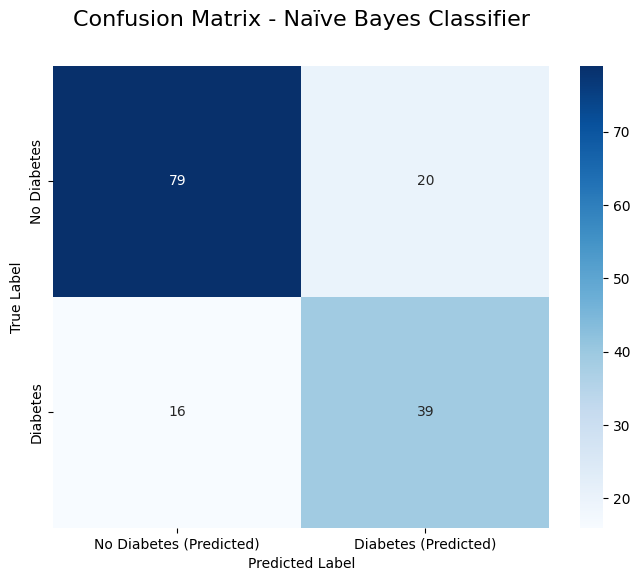


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# Display additional evaluation metrics (e.g., confusion matrix, classification report)
cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm, index=['No Diabetes', 'Diabetes'], columns=['No Diabetes (Predicted)', 'Diabetes (Predicted)'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
heatmap.set_title('Confusion Matrix - Naïve Bayes Classifier\n', fontdict={'fontsize': 16}, pad=12)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


2. Perform Regression using a Regression Tree on the following dataset:

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("/content/Walmart_sales.csv")

In [ ]:
# Select features and target variable
a = df1[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
b = df1['Weekly_Sales']

# Split the data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=100)

In [ ]:
print(a)
print(b)

      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1             0        42.31       2.572  211.096358         8.106
1         1             1        38.51       2.548  211.242170         8.106
2         1             0        39.93       2.514  211.289143         8.106
3         1             0        46.63       2.561  211.319643         8.106
4         1             0        46.50       2.625  211.350143         8.106
...     ...           ...          ...         ...         ...           ...
6430     45             0        64.88       3.997  192.013558         8.684
6431     45             0        64.89       3.985  192.170412         8.667
6432     45             0        54.47       4.000  192.327265         8.667
6433     45             0        56.47       3.969  192.330854         8.667
6434     45             0        58.85       3.882  192.308899         8.667

[6435 rows x 6 columns]
0       1643690.90
1       1641957.44
2       16119

In [ ]:
# Initialize the decision tree regressor
regressor = DecisionTreeRegressor( random_state=100)

# Train the regressor on the training data
regressor.fit(a_train, b_train)

DecisionTreeRegressor(random_state=100)

In [ ]:
# Make predictions on the test data
b_pred = regressor.predict(a_test)

# Calculate metrics (e.g., RMSE and R^2)
rmse = np.sqrt(mean_squared_error(b_test, b_pred))
r2 = r2_score(b_test, b_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Coefficient of Determination (R^2): {r2:.2f}")

Root Mean Squared Error (RMSE): 157217.25
Coefficient of Determination (R^2): 0.92


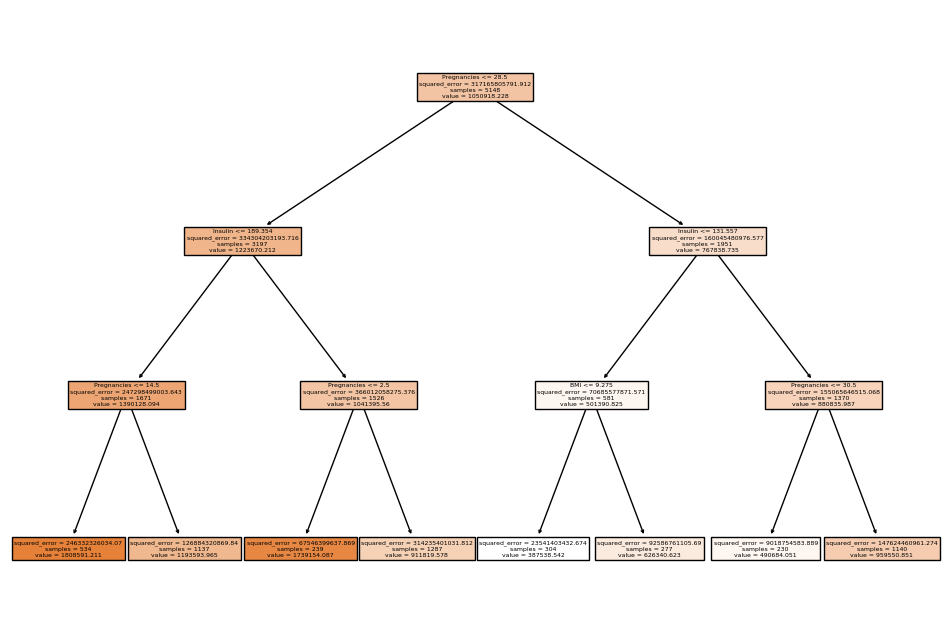

In [ ]:
# Plot the regression tree
plt.figure(figsize=(12,8))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()
